# Flight Price Prediction

## Submitted by Prashant Shekhar

Problem Statement:
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

## Importing datasets:

In [69]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [70]:
#importing train dataset
df = pd.read_csv("D:\Flight.csv") #Reading csv file
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [71]:
#importing test dataset
dff = pd.read_excel("D:\Test_set.xlsx") #Reading excel file
dff.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Above are my train and test datasets and the target is seems to be price so this perticular problem is a Regression problem.

## i) Train dataset:

## Preprocessing and EDA:

In [72]:
#Checking shape of my dataset
df.shape

(10683, 11)

In my tarin dataset i have 10683 rows and 11 columns.

In [73]:
#Checking all column names
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Above are the column names of the train dataset.

In [74]:
#Checking the data types of all columns
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Except Price all other columns are object type datas.But i have to convert date of journey, dep_time and arrival_time columns from object to datetime type data.

In [7]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are nan values in Route and Total_Stops columns.

In [8]:
#Checking unique values of each column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Above are the unique value counts of each column.

In [75]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019    

In [17]:
#Checking null values in the dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are only one nan values in Route and Total_Stops column.

## Imputation technique to replace nan values:

In [76]:
#Replacing naa values with there mode as those two columns are categorical
df["Route"] = df["Route"].fillna(df["Route"].mode()[0])
df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [77]:
#Checking null values again
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now all the nan values has been replaced.

In [78]:
#Checking unique values of target column
df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)


Above are the unique value counts of target column.

In [79]:
#Checking for empty observations
df.loc[df['Price'] == " "]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


There is no empty observations in my target column.

## Feature Extraction:

In [80]:
#Converting object data type to datetime 
df['Date_of_Journey'] =  pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] =  pd.to_datetime(df['Arrival_Time'])

In [81]:
#Checking the data types of all columns again
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

The data type has changed now.

In [83]:
#Extracting journey year,month and day from Date_of_journey

#Extracting year
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [84]:
#Droping Date_of_journey column after extraction
df = df.drop(["Date_of_Journey"],axis=1)

This particular Duration column is the difference between Arrival_time and Dep_time but the given Duration is not in format (i.e.,-h-m) so let me extract proper duration column from the Arrival_time and Dep_time.

In [85]:
#Extracting Duration column using Arrival_Time and Dep_Time
Difference = (df["Arrival_Time"]-df["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df["Duration"] = Difference_list

In [86]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

#Extracting Hours
df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [87]:
#Droping Dep_Time column after extraction
df = df.drop(["Dep_Time"],axis=1)

In [88]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

#Extracting Hours
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [89]:
#Droping Arrival_Time column after extraction
df = df.drop(["Arrival_Time"],axis=1)

In [23]:
#Printing the dataset after extraction
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-03-22 01:10:00,2.833333,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-08-30 13:15:00,7.416667,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-06-10 04:25:00,19.000000,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-08-30 23:30:00,5.416667,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-08-30 21:35:00,4.750000,1 stop,No info,13302,2019,1,3,16,50,21,35


In [90]:
#Lets check the value counts now
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
****************************************
DEL ? BOM ? COK          2377
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU

In Journey_Year column there is only one entry that is 2019 since all the samples are of this year.So let me drop this column.

In [91]:
#Droping unnecessary column
df = df.drop(["Journey_Year"],axis=1)


By looking into the categorical columns i can do grouping as follows.

In [92]:
#Grouping Airlines column
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [93]:
#Grouping Destination column
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [95]:
#Grouping Additional_Info column
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("No Info","No info",inplace=True)

In [96]:
#Let me assign values for Total_Stops column
df.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [97]:
#Printing the dataset
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR ? DEL,2.833333,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7.416667,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19.000000,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5.416667,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,4.750000,1,No info,13302,1,3,16,50,21,35


In [98]:
#Checking description of data set
df.describe()

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,8.206754,0.824207,9087.064121,5.534775,12.682205,12.490686,24.411214,13.348778,24.690630
std,6.387288,0.675199,4611.359167,2.987489,8.803701,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,0.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.333333,1.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,12.583333,1.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,23.916667,4.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


Above is the statistics about the dataset.The mean and the 2nd quantile values are not same so there is extreme outliers in the dataset.

## Visualization:

## Univariate Analysis:

In [99]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


Above are the categorical columns in the data set.

In [100]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Duration', 'Total_Stops', 'Price', 'Journey_Month', 'Journey_Day', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


Above are the numerical columns in the data set.

## Univariate analysis for numerical columns:

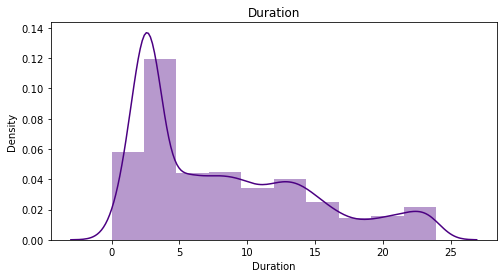

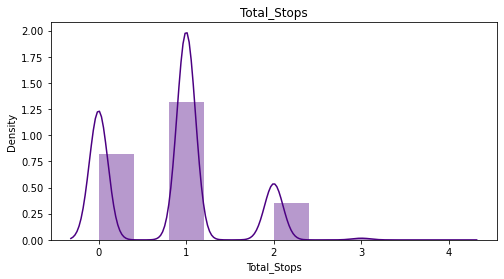

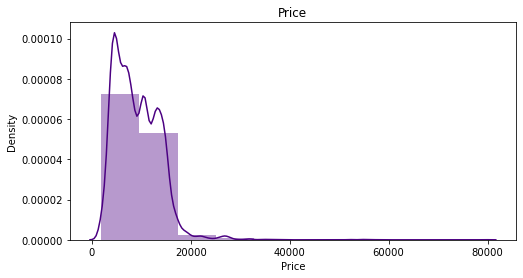

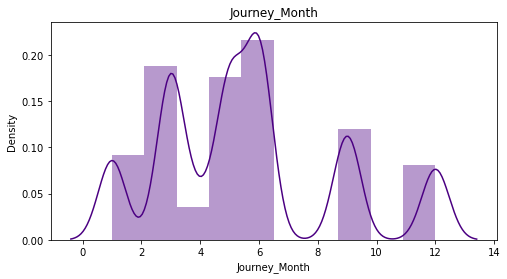

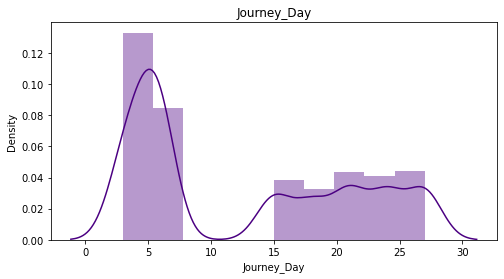

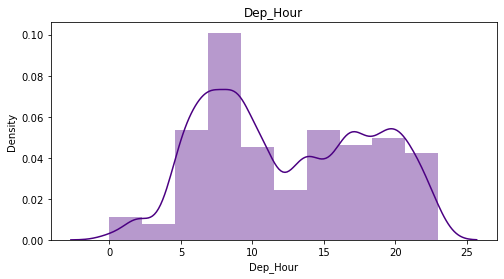

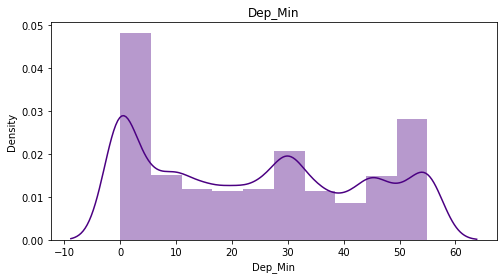

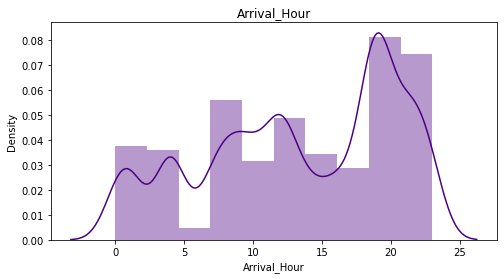

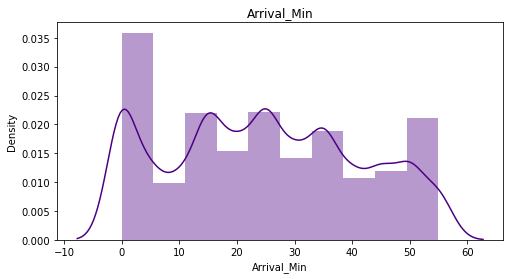

In [101]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

There is some skewness in some of the columns i have remove that.

## Univariate Analysis for categorical columns:

In [102]:
#Checking the value counts of Airline column
df.Airline.value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

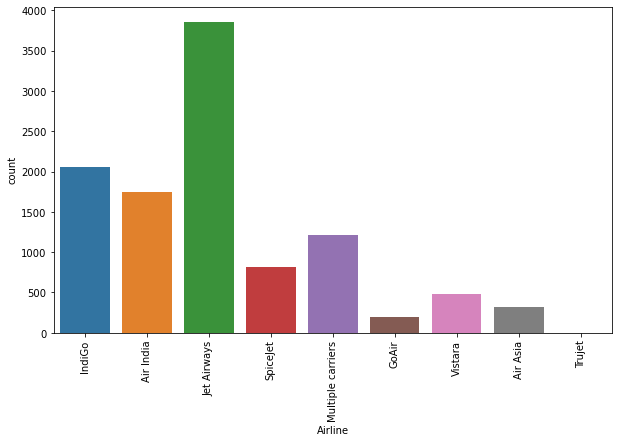

In [103]:
#Count plot for Airline column
plt.figure(figsize=[10,6])
sns.countplot(df['Airline'])
plt.xticks(rotation=90);

Jet Airways has maximum conut which means most of the passengers prefered Jet Airways for there travelling in the year 2019.

Trujet and GoAir has very less count which means only few poeple opted this airlines for there travelling in 2019.

In [104]:
#Checking the value counts of Source column
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

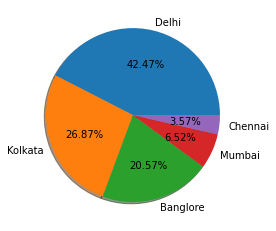

In [105]:
#Ploting pie chart for Source column
labels='Delhi','Kolkata','Banglore','Mumbai','Chennai'
fig, ax = plt.subplots()
ax.pie(df['Source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Delhi is having maximum count which means Delhi is taken as source in maximum airlines.

In [106]:
#Checking the value counts of Destination column
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

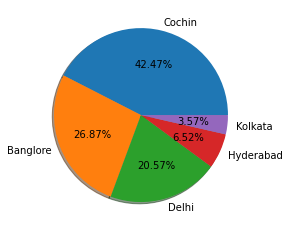

In [107]:
#Ploting pie chart for Destination column
labels='Cochin','Banglore','Delhi','Hyderabad','Kolkata'
fig, ax = plt.subplots()
ax.pie(df['Destination'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

For maximum airlines Cochin is the destination.And for few airlines kolkata is the destination.

In [109]:
#Checking the value counts of Route column
df.Route.value_counts()

DEL ? BOM ? COK          2377
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

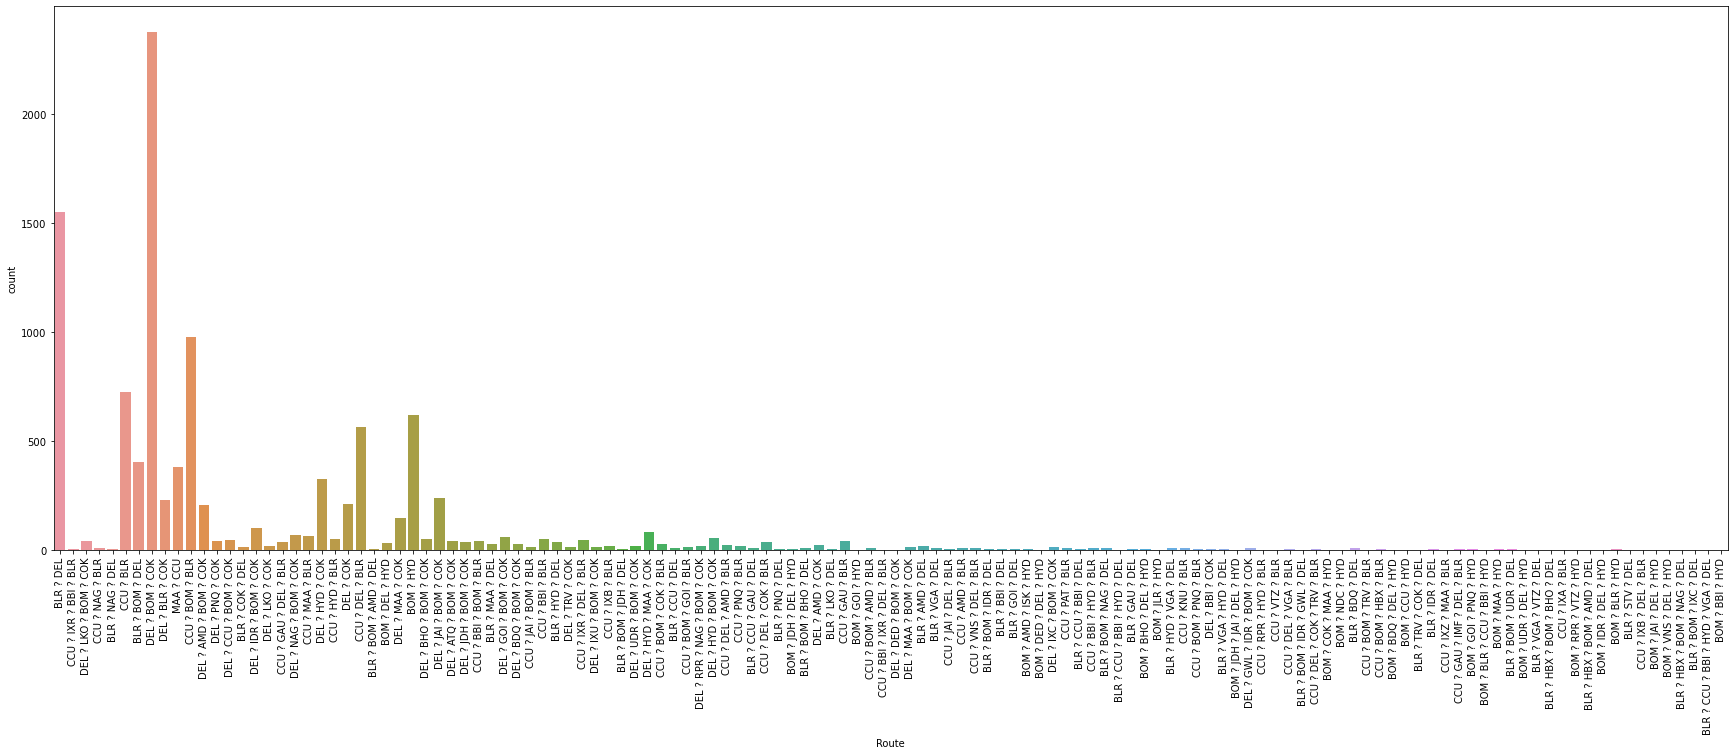

In [110]:
#Count plot for Route column
plt.figure(figsize=[30,10])
sns.countplot(df['Route'])
plt.xticks(rotation=90);

Maximum people has choosen DEL->BOM->COK as there route.

In [111]:
#Checking the value counts of Additional_Info column
df.Additional_Info.value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

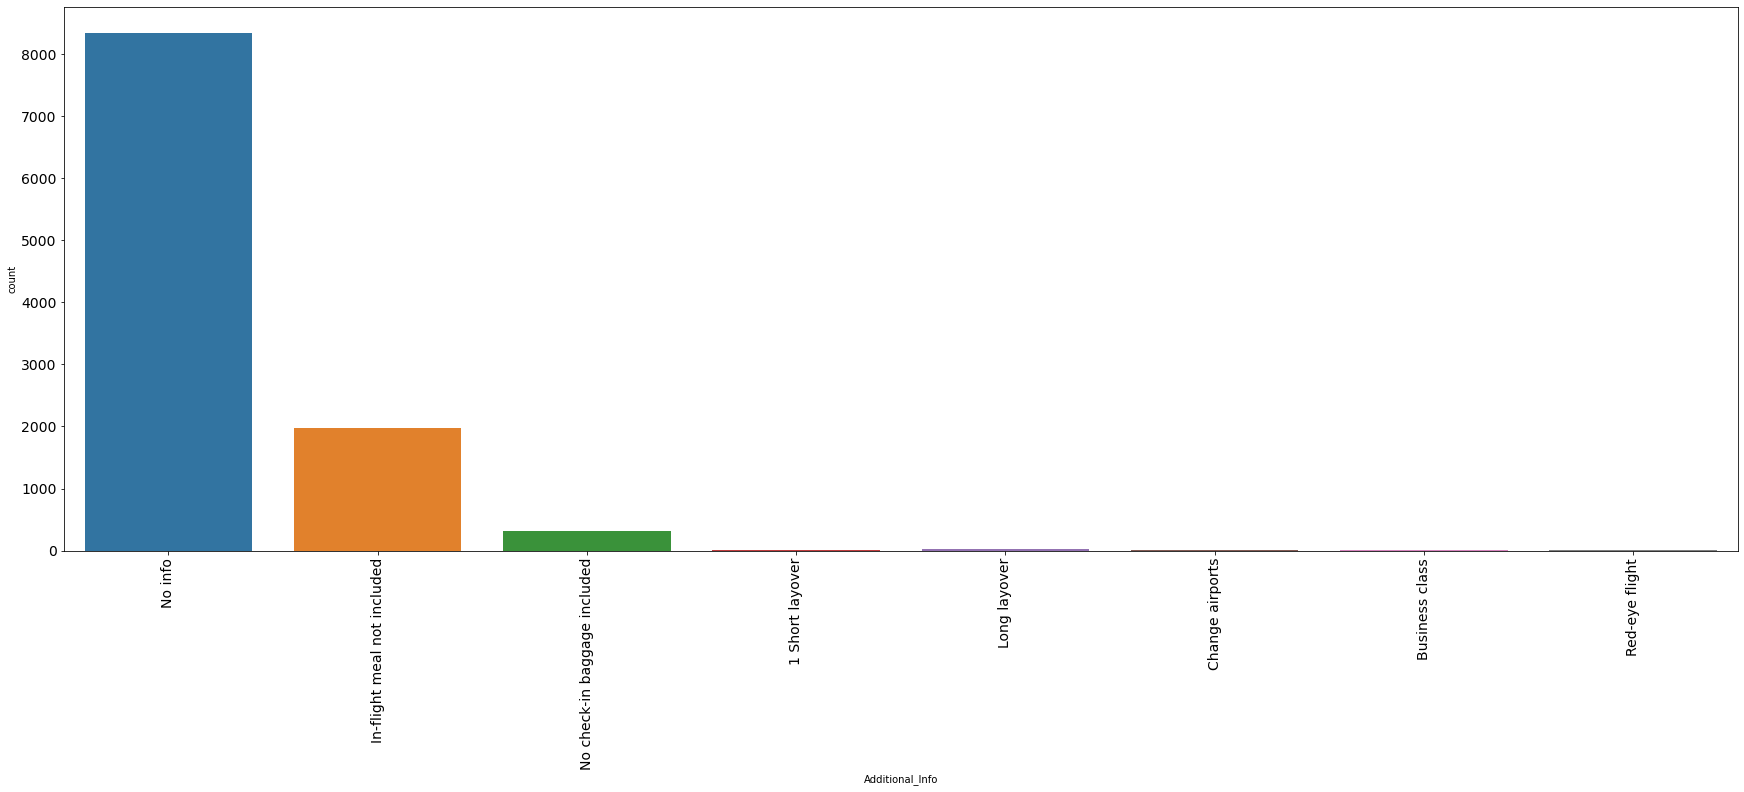

In [43]:
#Count plot for Additional_Info column
plt.figure(figsize=[30,10])
sns.countplot(df['Additional_Info'])
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14);

In most of the flights Additional Info is No Info.

## Bivariate Analysis:

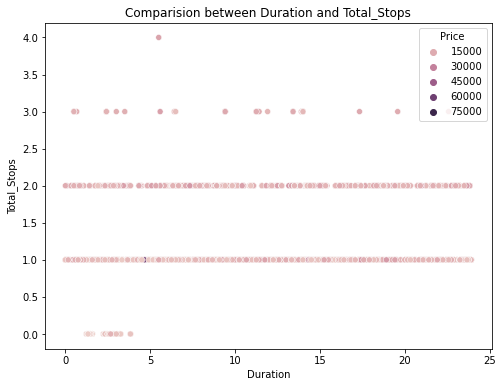

In [112]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Duration and Total_Stops')
sns.scatterplot(df['Duration'],df['Total_Stops'],hue=df['Price']);

Irrespective of Duration 1 and 2 Stops are more in count.So All the maximum airlines have maximum 1 or 2 stops.

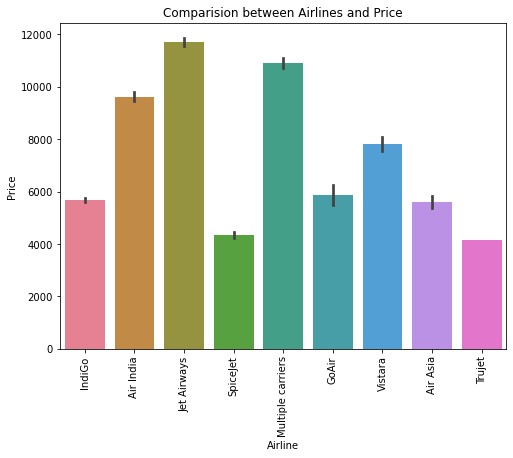

In [113]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Airlines and Price')
sns.barplot(df['Airline'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

In Air India, Multiple carriers and Jet Airways the price is high they look costly.Trujet and Spicejet are cheaper compared to other airlines.

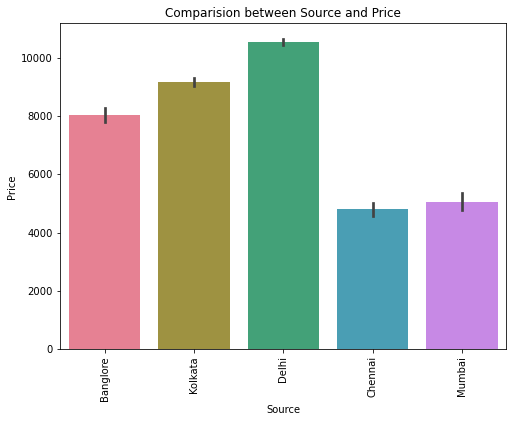

In [114]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Price')
sns.barplot(df['Source'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


If Delhi is the source then the Price is more, if Chennai is the source then the Price is very less.

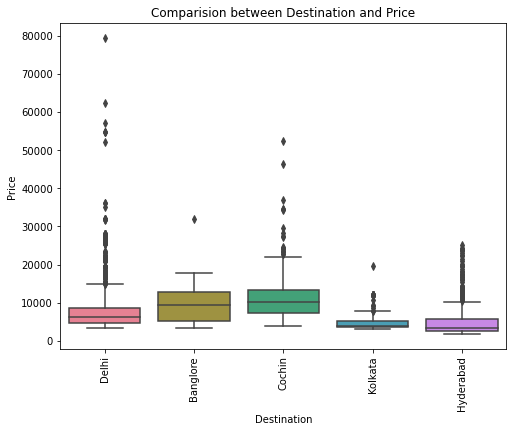

In [115]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Price')
sns.boxplot(df['Destination'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


If Cochin is the destination then the orice is more compared to other airlines.

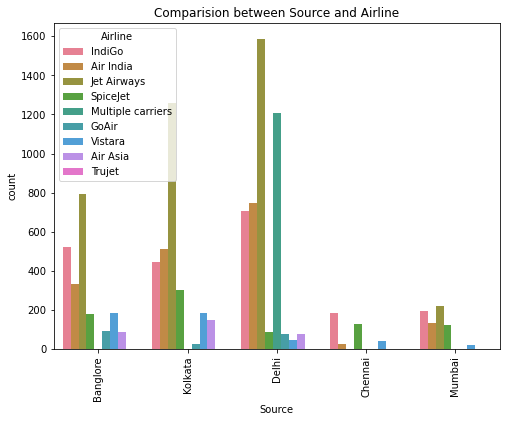

In [116]:
#Comparision between features using count plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Airline')
sns.countplot(x="Source",hue="Airline",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

Except Chennai in all other sources Jet Airways is famous.

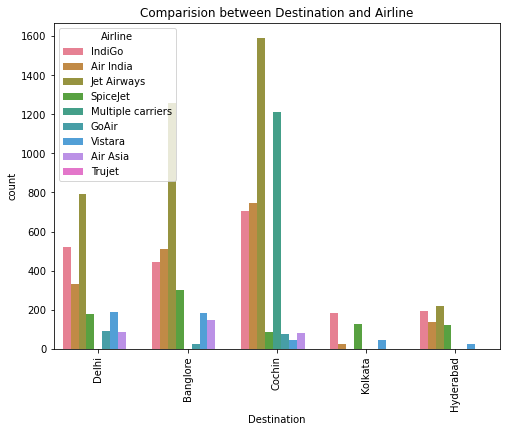

In [117]:
#Comparision between features using count plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Airline')
sns.countplot(x="Destination",hue="Airline",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

Cochin is the maximum destination with maximum count for Jet Airways which means Jet Airways is famous in those destinations.

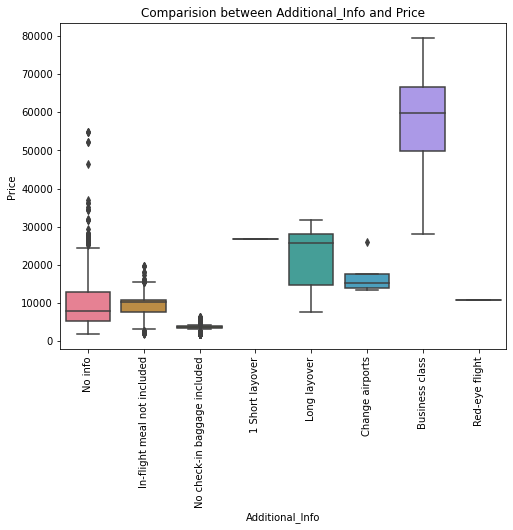

In [118]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Additional_Info and Price')
sns.boxplot(df['Additional_Info'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

For having Business class the price is very high.And for No checkin baggage included the price is very low.

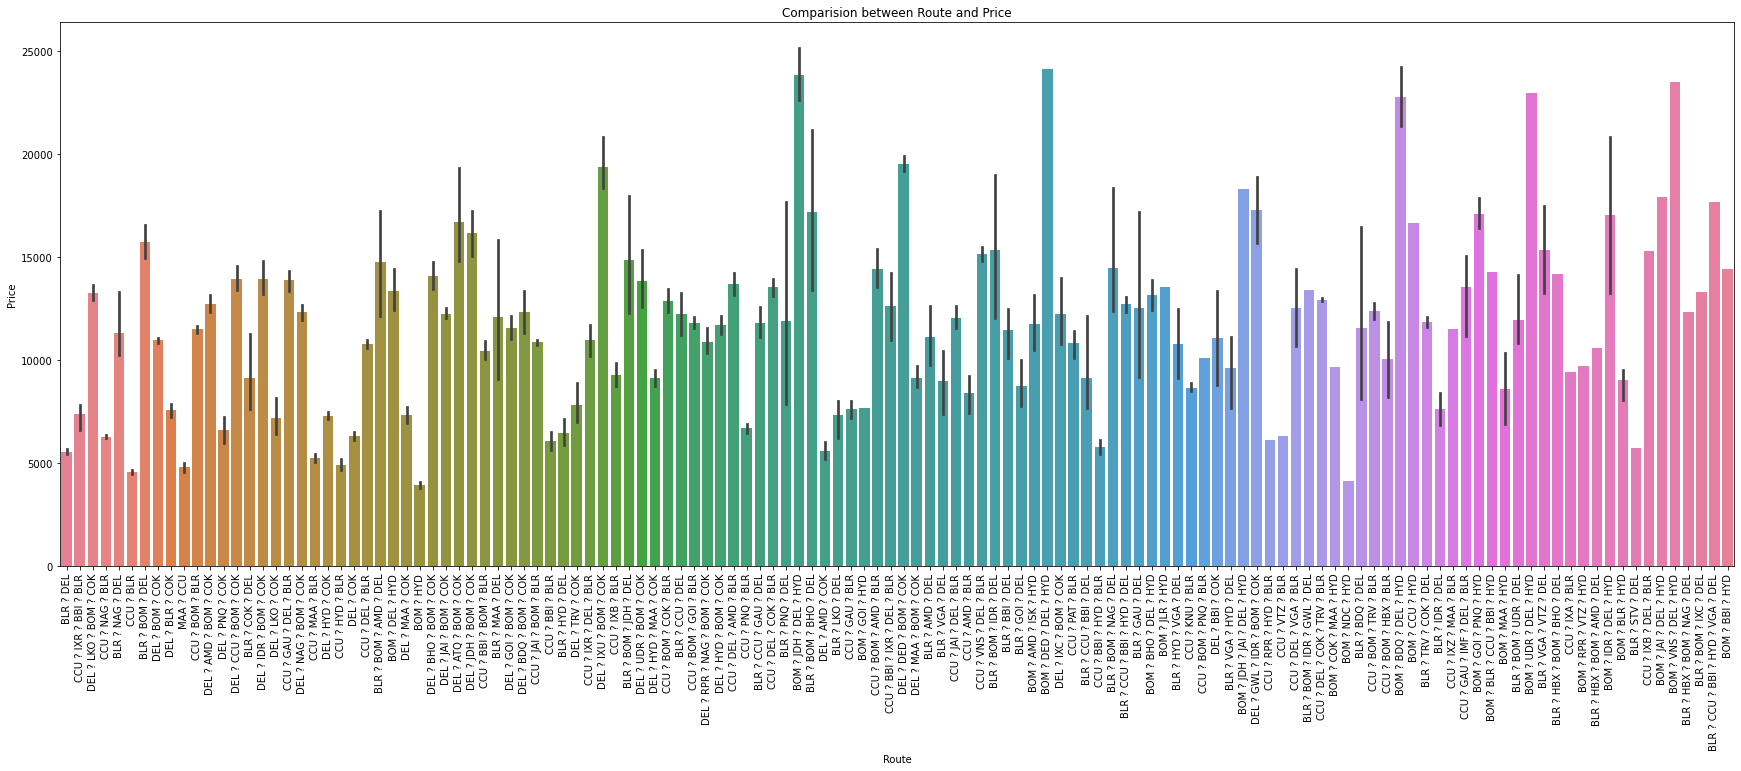

In [119]:
#Comparision between features using box plot
plt.figure(figsize=[30,10])
plt.title('Comparision between Route and Price')
sns.barplot(df['Route'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

BOM->JDH->DEL->HYD, BOM->DED->DEL->HYD and BOM->BOQ->DEL->HYD Routes has maximum price compared to other routes.

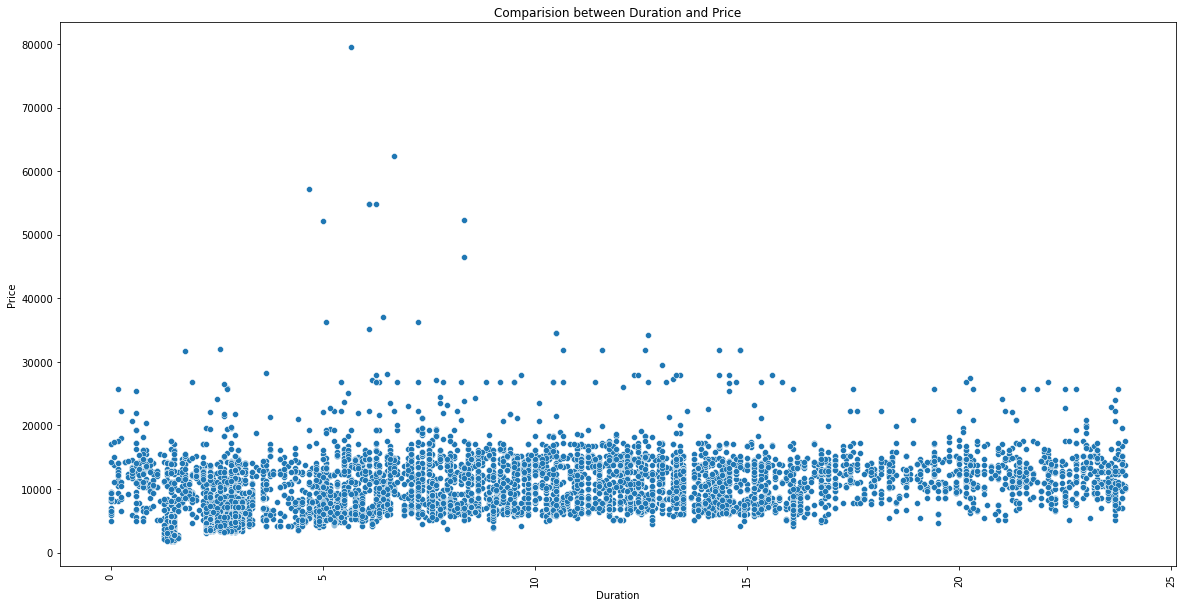

In [121]:
#Comparision between features using scatter plot
plt.figure(figsize=[20,10])
plt.title('Comparision between Duration and Price')
sns.scatterplot(df['Duration'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

For all the Durations the price range is almost same.

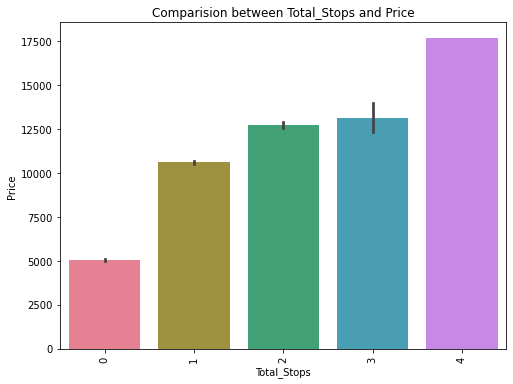

In [122]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Total_Stops and Price')
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

For non stop flights price is less, for 4 stops flight the price is very high.

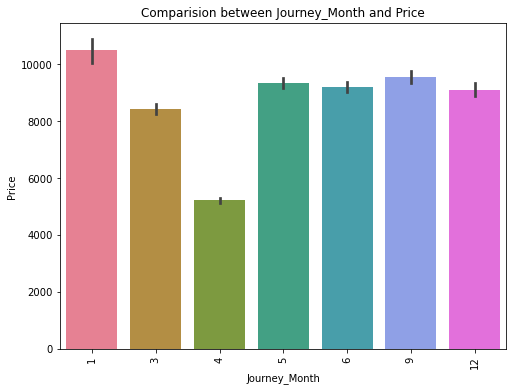

In [123]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Month and Price')
sns.barplot(df['Journey_Month'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

In Jan the Price of airlines is high and in April the price is low.Except these two in all other months the price is constant.

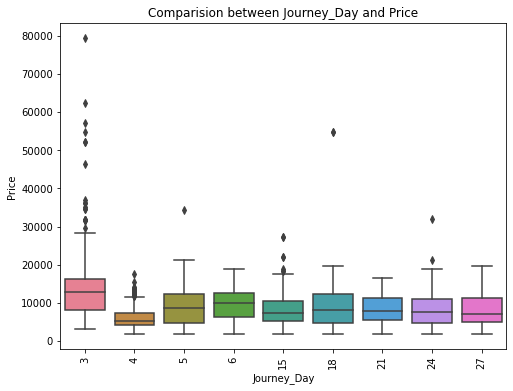

In [124]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Day and Price')
sns.boxplot(df['Journey_Day'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

In 3rd day of each month the price is high which means it may be max weekends.And in 4th the price is low,except these two all other days the price is constant.

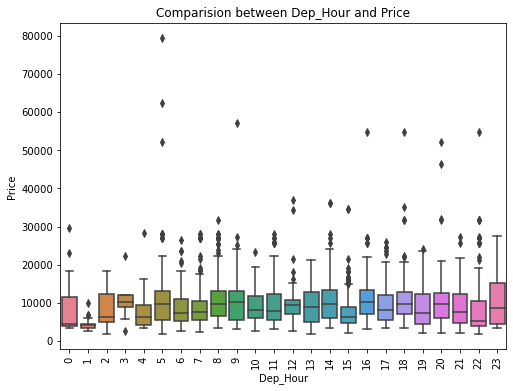

In [125]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Dep_Hour and Price')
sns.boxplot(df['Dep_Hour'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

Dep_Hour has no proper relation with price.

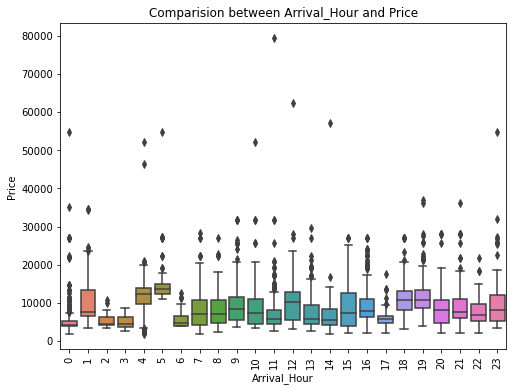

In [126]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Arrival_Hour and Price')
sns.boxplot(df['Arrival_Hour'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

Arrival_Hour has no proper relation with price.

## Checking for outliers:

<AxesSubplot:>

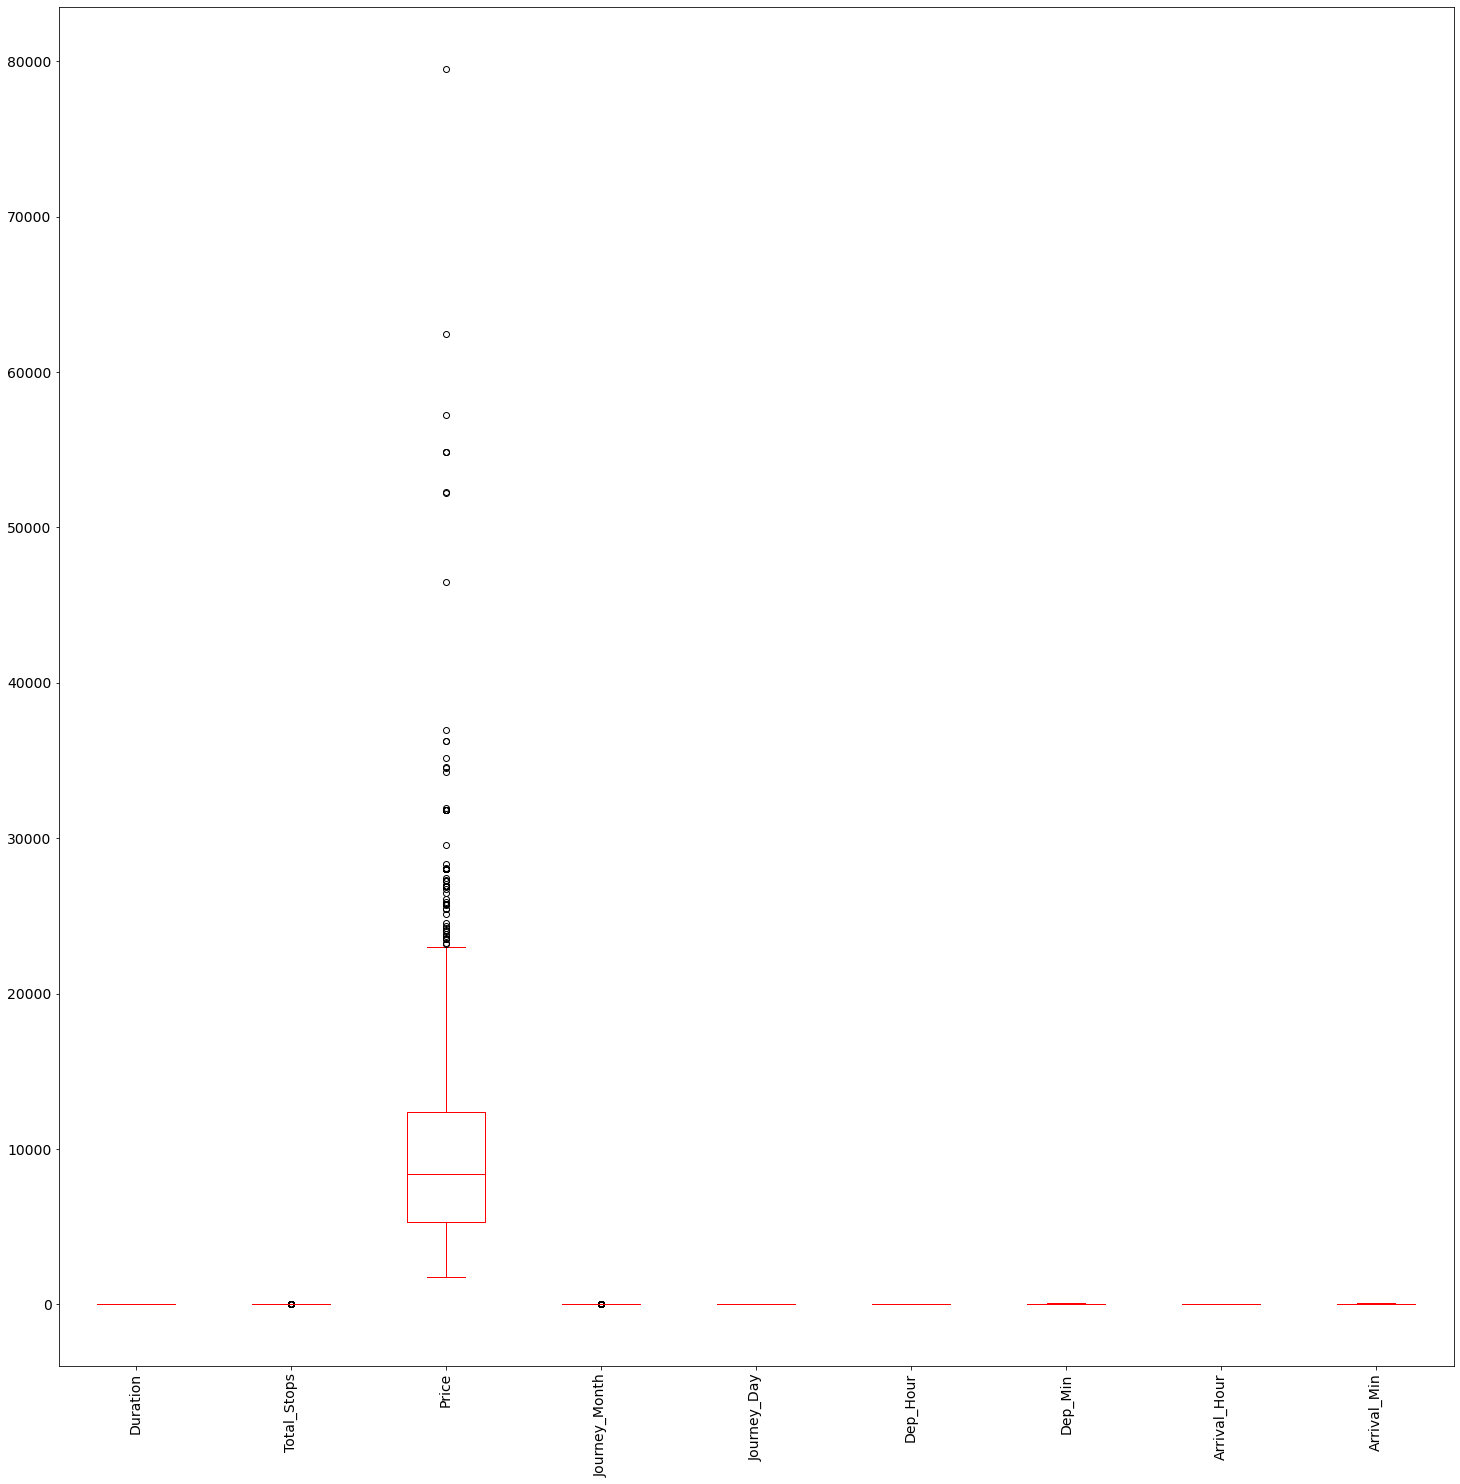

In [127]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')


There are outliers in

Total_Stops

Price

Journey_Month

Since Price is my target i should not remove outliers from this column.And Total_Stops is a categorical column So i should not remove outliers here also.

## Removing Outliers:

## i) Zscore method:

In [128]:
#Features having outliers
features=df[['Journey_Month']]

Above are the list of columns with outliers.

In [129]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR ? DEL,2.833333,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7.416667,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19.000000,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5.416667,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,4.750000,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2.500000,0,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,2.583333,0,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3.000000,0,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR ? DEL,2.666667,0,No info,12648,1,3,11,30,14,10


I have removed the skewness using zscore method.

In [130]:
#Checking shape of new dataset
df_new.shape

(10683, 14)

In my new dataset i have 10683 rows and 14 columns.

In [131]:
#Checking shape of old dataset
df.shape

(10683, 14)

In my old dataset i have 10683 rows and 14 columns.

In [132]:
#Checking dataloss in zscore method
Dataloss = (((10683-10683)/10683)*100)
Dataloss

0.0

There is no dataloss in zscore method which means it has not removed any outliers.So let me have a look into IQR method.

## ii) IQR method:

In [133]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [134]:
#Checking shape of new dataset
df_1.shape

(9726, 14)

In my new dataset i have 9726 rows and 14 columns.

In [135]:
#Checking shape of old dataset
df.shape

(10683, 14)


In my old dataset i have 10683 rows and 14 columns.

In [136]:
#Checking dataloss in IQR method
Dataloss = (((10683-9726)/10683)*100)
Dataloss

8.958157820836844

In IQR method the data loss is less than 10% so i can use IQR method to remove outliers.

## Checking for skewness:

In [137]:
#Checking for skewness
df_1.skew()

Duration         0.851356
Total_Stops      0.315096
Price            1.892394
Journey_Month    0.179871
Journey_Day      0.205870
Dep_Hour         0.123756
Dep_Min          0.177822
Arrival_Hour    -0.374118
Arrival_Min      0.111059
dtype: float64

There is skewness in Duration and Price.Since Price is my target i should not remove skewness in that column since i don't want my target to get manupulated.

## Removing skewness using yeo-johnson method:

In [138]:
#Creating a list of skewed features
fea=["Duration"]

Taking a list as fea with all the columns with skewness.

In [142]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removing the skewness.

In [143]:
df_1[fea] = scaler.fit_transform(df_1[fea].values)

Got removed from skewness.

In [145]:
#Checking skewness again
df_1[fea].skew()

Duration   -0.009113
dtype: float64

The skewness has removed now.Let me proceed.

<AxesSubplot:xlabel='Duration', ylabel='Density'>

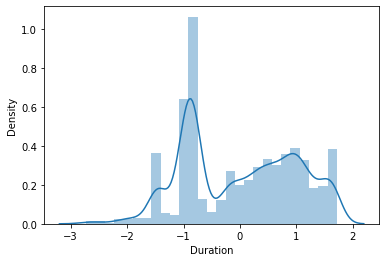

In [146]:
sns.distplot(df_1['Duration'])

It looks like the skewness is reduced.

## Label Encoding:

In [147]:
# Separating categorical columns in df_1
cat_col=[]
for i in df_1.dtypes.index:
    if df_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


Above are the list of categorical columns in df_1.

In [148]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_1[cat_col]= df_1[cat_col].apply(LE.fit_transform)

Using label encoder i have encoded the categorical columns.

## Checking correlation using heat map:

In [149]:
cor=df_1.corr()

Checking correlation.

In [150]:
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.011183,0.060652,0.017397,-0.028706,-0.172712,-0.146616,0.020880,0.008746,0.025750,-0.024661,-0.067040,-0.014642,-0.083493
Source,-0.011183,1.000000,-0.428689,0.385694,0.066462,0.189680,-0.042452,0.010360,0.071145,0.009863,0.064645,-0.045119,0.023022,0.018436
Destination,0.060652,-0.428689,1.000000,-0.210140,-0.392758,-0.425690,0.076846,-0.263846,-0.072687,0.003989,-0.087151,0.091917,-0.059000,0.006345
Route,0.017397,0.385694,-0.210140,1.000000,0.338406,0.470162,0.017851,0.170346,0.131410,0.076424,-0.074617,-0.054603,0.016679,-0.177685
Duration,-0.028706,0.066462,-0.392758,0.338406,1.000000,0.621633,-0.129579,0.474748,0.064569,-0.022737,-0.031827,-0.041963,0.011883,-0.152024
Total_Stops,-0.172712,0.189680,-0.425690,0.470162,0.621633,1.000000,-0.083619,0.596254,0.076029,-0.022166,-0.060973,-0.007590,0.040415,-0.108505
Additional_Info,-0.146616,-0.042452,0.076846,0.017851,-0.129579,-0.083619,1.000000,-0.042563,-0.018736,-0.036811,-0.043188,-0.007537,0.030537,0.041405
Price,0.020880,0.010360,-0.263846,0.170346,0.474748,0.596254,-0.042563,1.000000,0.013499,-0.175841,0.007035,-0.030633,0.021683,-0.083728
Journey_Month,0.008746,0.071145,-0.072687,0.131410,0.064569,0.076029,-0.018736,0.013499,1.000000,-0.117084,0.015338,-0.027075,-0.012621,-0.046453
Journey_Day,0.025750,0.009863,0.003989,0.076424,-0.022737,-0.022166,-0.036811,-0.175841,-0.117084,1.000000,0.006146,-0.006040,-0.000101,-0.019700


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

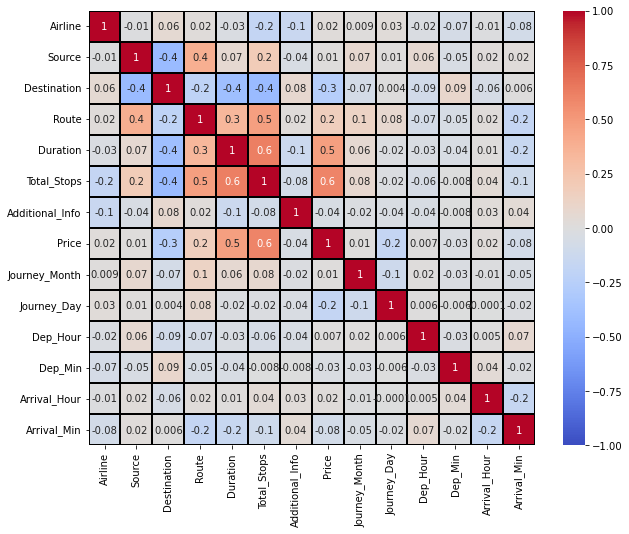

In [151]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue in any features.

With target Duration and total stops is higly correlated.

Dep_Hour is very less correlated with target.

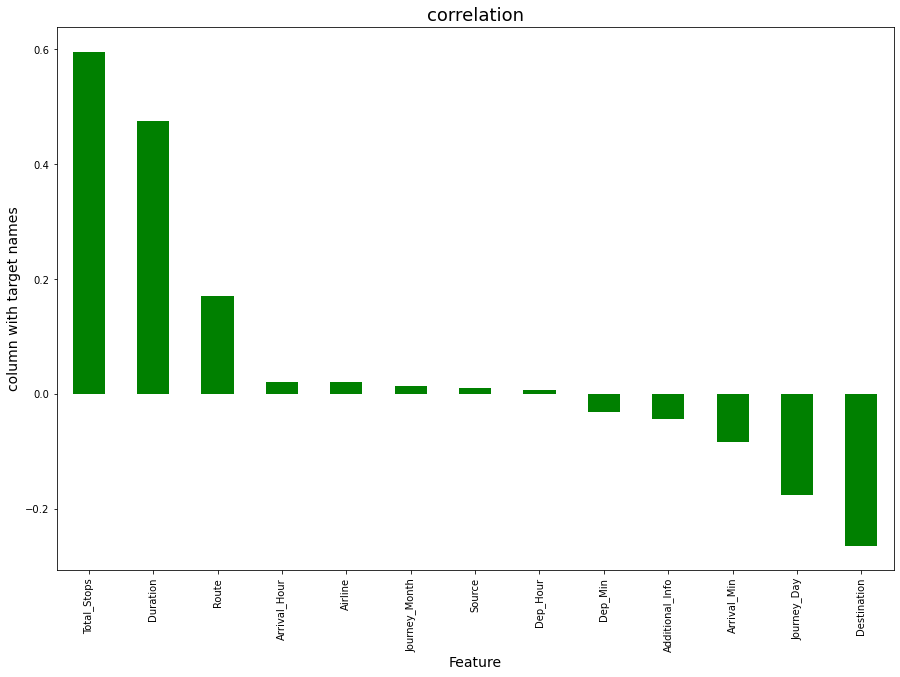

In [152]:
plt.figure(figsize=(15,10))
df_1.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Dep_Hour and Source is very less correlated with target.

## ii) Test dataset:

In [153]:
#Printing test dataset
dff.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [154]:
#Checking shape of test my dataset
dff.shape

(2671, 10)

In this test dataset i have 2671 rows and 10 columns.

In [155]:
#Checking all column names
dff.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

Above are the list of column names in test dataset.

In [156]:
#Checking the data types of all columns
dff.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the columns are object type data.

In [157]:
#Checking the info about the dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


There is no null values.

In [158]:
#Checking unique values of each column
dff.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

Above are the unique value counts of all the columns.

In [159]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in dff.columns:
        print(dff[i].value_counts())
        print('****************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
****************************************
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019  

In [160]:
#Checking null values in the dataset
dff.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no null values.

## Feature Extraction:

In [161]:
#Converting object data type to datetime 
dff['Date_of_Journey'] =  pd.to_datetime(dff['Date_of_Journey'])
dff['Dep_Time'] =  pd.to_datetime(dff['Dep_Time'])
dff['Arrival_Time'] =  pd.to_datetime(dff['Arrival_Time'])

In [162]:
#Checking the data types of all columns again
dff.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

The data type has changed now.

In [163]:
#Extracting journey year,month and day from Date_of_journey

#Extracting year
dff["Journey_Year"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
dff["Journey_Month"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
dff["Journey_Day"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.day

In [164]:
#Droping Date_of_journey column after extraction
dff = dff.drop(["Date_of_Journey"],axis=1)

This particular Duration column is the difference between Arrival_time and Dep_time but the given Duration is not in format (i.e.,-h-m) so let me extract proper duration column from the Arrival_time and Dep_time.

In [165]:
#Extracting Duration column using Arrival_Time and Dep_Time
Difference = (dff["Arrival_Time"]-dff["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
dff["Duration"] = Difference_list

In [166]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
dff["Dep_Hour"]=pd.to_datetime(dff["Dep_Time"]).dt.hour

#Extracting Hours
dff["Dep_Min"]=pd.to_datetime(dff["Dep_Time"]).dt.minute

In [167]:
#Droping Dep_Time column after extraction
dff = dff.drop(["Dep_Time"],axis=1)

In [168]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
dff["Arrival_Hour"]=pd.to_datetime(dff["Arrival_Time"]).dt.hour

#Extracting Hours
dff["Arrival_Min"]=pd.to_datetime(dff["Arrival_Time"]).dt.minute

In [169]:
#Droping Arrival_Time column after extraction
dff = dff.drop(["Arrival_Time"],axis=1)

In [170]:
#Printing the dataset after extraction
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,2019,6,24,23,55,2,45


In [171]:
#Lets check the value counts now
for i in dff.columns:
        print(dff[i].value_counts())
        print('****************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
****************************************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
****************************************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → 

In Journey_Year column there is only one entry that is 2019 since all the samples are of this year.So let me drop this column.

In [172]:
#Droping unnecessary column
dff = dff.drop(["Journey_Year"],axis=1)

By looking into the categorical columns i can do grouping as follows.

In [173]:
#Grouping Airlines column
dff["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

dff["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

dff["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [174]:

#Grouping Destination column
dff["Destination"].replace("New Delhi","Delhi",inplace=True)

In [175]:

#Grouping Additional_Info column
dff["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

dff["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

dff["Additional_Info"].replace("No Info","No info",inplace=True)

In [176]:

#Let me assign values for Total_Stops column
dff.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [177]:
#Printing the dataset
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,6,24,23,55,2,45


In [178]:
#Checking description of data set
dff.describe()

,Duration,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,8.308187,0.833396,5.607263,12.026956,12.603519,24.891426,13.585174,24.558218
std,6.331450,0.672315,3.042952,8.564408,5.686673,19.086522,7.040396,16.775436
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.833333,0.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.500000,1.000000,5.000000,6.000000,12.000000,25.000000,15.000000,25.000000
75%,12.583333,1.000000,6.000000,21.000000,18.000000,45.000000,19.000000,35.000000
max,23.916667,4.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


Above is the statistics about the dataset.The mean and the 2nd quantile values are not same so there is extreme outliers in the dataset.

## Checking for outliers:

<AxesSubplot:>

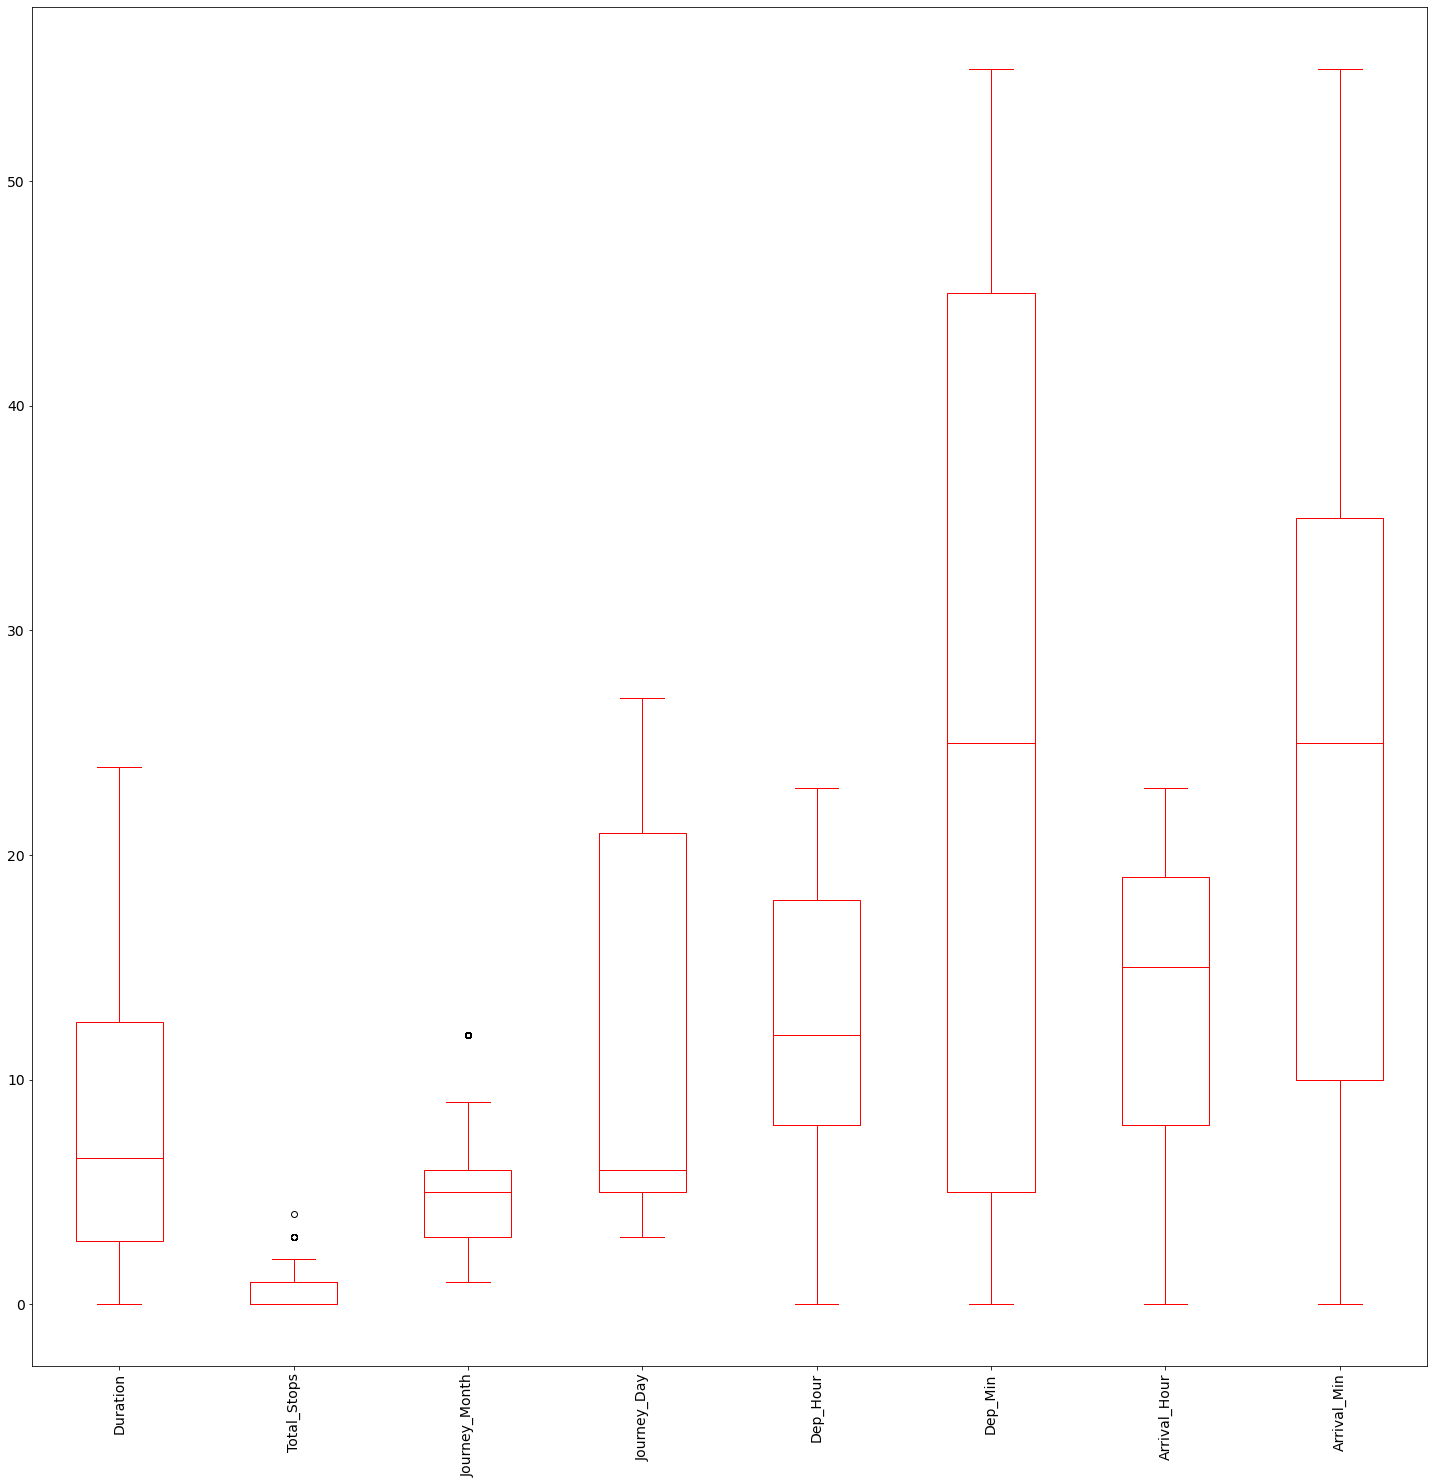

In [179]:
#Checking for outliers using boxplot
dff.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')


There are outliers in

Total_Stops

Journey_Month

Since Total_Stops is a categorical column So i should not remove outliers here.

## Removing Outliers:

## i) Zscore method:

In [112]:
#Features having outliers
features=dff[['Journey_Month']]

Above are the list of columns with outliers.

In [180]:
from scipy.stats import zscore
z=np.abs(zscore(features))
dff_new=dff[(z<3).all(axis=1)]
dff_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23.916667,1,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2.583333,0,No info,3,27,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6.583333,1,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15.250000,1,No info,6,3,4,0,19,15


I have removed the skewness using zscore method.

In [181]:
#Checking shape of new dataset
dff_new.shape

(2671, 13)

In [182]:
#Checking shape of old dataset
dff.shape

(2671, 13)

In [183]:
#Checking dataloss in zscore method
Dataloss = (((2671-2671)/2671)*100)
Dataloss

0.0

There is no dataloss in zscore method which means it has not removed any outliers.So let me have a look into IQR method.

## ii) IQR mathod:

In [184]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [185]:
#Checking shape of new dataset
dff_1.shape

(2414, 13)

In [186]:
#Checking shape of old dataset
dff.shape

(2671, 13)

In [187]:
#Checking dataloss in IQR method
Dataloss = (((2671-2414)/2671)*100)
Dataloss

9.621864470235867

In IQR method the data loss is less than 10% so i can use IQR method to remove outliers.

## Checking for skewness:

In [188]:
#Checking for skewness
dff_1.skew()

Duration         0.812134
Total_Stops      0.327634
Journey_Month    0.156564
Journey_Day      0.310730
Dep_Hour         0.107732
Dep_Min          0.126943
Arrival_Hour    -0.444721
Arrival_Min      0.096564
dtype: float64

There is skewness in Duration.

## Removing skewness using yeo-johnson method:

In [189]:
#Creating a list of skewed features
fea=["Duration"]

Taking a list as fea with all the columns with skewness.

In [190]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removing the skewness.

In [191]:
dff_1[fea] = scaler.fit_transform(dff_1[fea].values)

Got removed from skewness.

In [192]:
#Checking skewness again
dff_1[fea].skew()

Duration   -0.01338
dtype: float64

The skewness has removed now.Let me proceed.

<AxesSubplot:xlabel='Duration', ylabel='Density'>

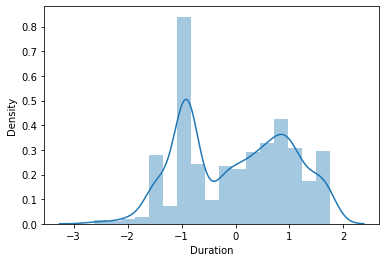

In [193]:
sns.distplot(dff_1['Duration'])

It looks like the skewness is reduced.

## Label Encoding:

In [194]:
# Separating categorical columns in dff_1
cat_col=[]
for i in dff_1.dtypes.index:
    if dff_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


Above are the list of categorical columns in dff_1.

In [195]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dff_1[cat_col]= dff_1[cat_col].apply(LE.fit_transform)

In [196]:
dff_1[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,4,2,1,70,5
2,4,2,1,70,2
3,5,2,1,70,5
4,0,0,2,14,5
7,3,3,0,52,5


Using label encoder i have encoded the categorical columns.

## Checking correlation using heat map:

In [197]:
cor=dff_1.corr()

Checking correlation.

In [198]:
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.025743,0.073316,0.006619,-0.055145,-0.192535,-0.149410,-0.002283,0.007439,0.009846,-0.059759,-0.015035,-0.108238
Source,-0.025743,1.000000,-0.389236,0.330589,0.051402,0.183536,-0.036250,0.044850,-0.025131,0.069805,-0.049378,0.003893,-0.022964
Destination,0.073316,-0.389236,1.000000,-0.229631,-0.406966,-0.433933,0.083267,-0.050412,0.020449,-0.071824,0.104231,-0.035278,0.020444
Route,0.006619,0.330589,-0.229631,1.000000,0.360363,0.484534,0.040619,0.129223,0.040341,-0.123306,-0.036332,-0.000204,-0.225181
Duration,-0.055145,0.051402,-0.406966,0.360363,1.000000,0.633328,-0.121802,0.066728,-0.052472,-0.082031,-0.036776,-0.013730,-0.167460
Total_Stops,-0.192535,0.183536,-0.433933,0.484534,0.633328,1.000000,-0.069234,0.084167,-0.038463,-0.102686,-0.003003,0.034922,-0.118665
Additional_Info,-0.149410,-0.036250,0.083267,0.040619,-0.121802,-0.069234,1.000000,0.033281,-0.041788,-0.062081,0.019532,0.011078,0.022466
Journey_Month,-0.002283,0.044850,-0.050412,0.129223,0.066728,0.084167,0.033281,1.000000,-0.111535,-0.029400,-0.009782,0.010870,-0.026181
Journey_Day,0.007439,-0.025131,0.020449,0.040341,-0.052472,-0.038463,-0.041788,-0.111535,1.000000,-0.011166,-0.021626,0.017975,-0.017399
Dep_Hour,0.009846,0.069805,-0.071824,-0.123306,-0.082031,-0.102686,-0.062081,-0.029400,-0.011166,1.000000,-0.041386,-0.000559,0.068546



Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

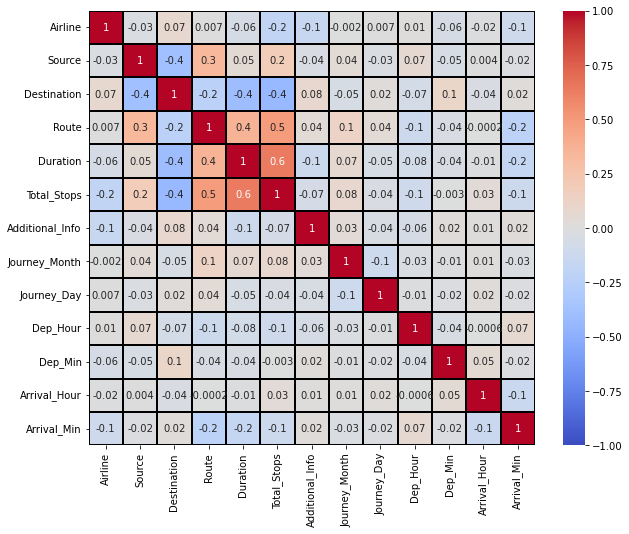

In [200]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(dff_1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);


There is no multicolinearity issue in any features.

## Scaling the data using standard scaler:

In [201]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff_1), columns=dff_1.columns)

I have scaled my data using standard scaler.

In [202]:
X_1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.243561,0.042047,-0.184755,0.784578,0.679728,0.258811,0.463204,0.460712,-0.778303,0.787794,0.270961,-1.357442,0.016725
1,0.243561,0.042047,-0.184755,0.784578,1.735062,0.258811,-2.246426,0.031473,0.948874,1.140228,-0.512706,0.768368,-1.467637
2,0.825697,0.042047,-0.184755,0.784578,0.909146,0.258811,0.463204,0.031473,0.948874,-0.798160,-1.296373,1.051809,-1.467637
3,-2.084982,-1.649655,0.845266,-1.413788,-0.885227,-1.228737,0.463204,0.460712,1.294310,1.845097,1.577073,-1.640883,1.204215
4,-0.338574,0.887898,-1.214777,0.077960,-0.221330,0.258811,0.463204,-1.685484,-0.893448,0.435360,-0.512706,0.910089,0.313598


## Checking for multicolinearity issue using VIF:

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.108317,Airline
1,1.353865,Source
2,1.540213,Destination
3,1.582325,Route
4,1.873648,Duration
5,2.150076,Total_Stops
6,1.068353,Additional_Info
7,1.032979,Journey_Month
8,1.028633,Journey_Day
9,1.048960,Dep_Hour



There is no multicolinearity issue in this dataset.

Now my test dataset is ready for prediction.

## MODEL BUILDING FROM TRAIN DATASET:

## Separating features and label in train dataset:

In [204]:
x = df_1.drop("Price",axis=1)
y = df_1["Price"]

I have separated my target and independent columns.

In [ ]:
## Scaling the data using standard scaler:

In [205]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

In [206]:
X.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.341739,-1.669916,0.813802,-1.561573,-0.847629,-1.215953,0.504758,-0.825893,1.190880,1.662506,-0.225703,-1.789294,-0.887038
1,-1.459531,0.906072,-1.178405,0.206403,0.236806,1.748418,0.504758,-1.695886,-0.948377,-1.295187,1.375647,-0.048504,-0.584070
2,0.217157,0.047409,-0.182302,1.175939,1.416403,1.748418,0.504758,1.784083,-0.835785,-0.599259,0.041189,-1.354097,0.021868
3,-0.341739,-1.669916,0.813802,-1.247899,-0.286971,0.266233,0.504758,-1.695886,-1.173562,0.618614,1.375647,1.112022,0.627805
4,1.334949,0.906072,-1.178405,-0.363911,-1.007235,-1.215953,0.504758,0.479095,1.190880,-0.599259,-1.293269,-0.338636,0.021868


This is the data of independent variables after scaling.

## Checking for multicolinearity issue using VIF:

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.095800,Airline
1,1.485132,Source
2,1.596196,Destination
3,1.621648,Route
4,1.803856,Duration
5,2.098797,Total_Stops
6,1.063215,Additional_Info
7,1.039366,Journey_Month
8,1.031429,Journey_Day
9,1.032382,Dep_Hour


There is no multicolinearity issue in this dataset.

## Finding Best Random State and Accuracy:

In [208]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [209]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9125323806652302  on Random_state  141


I got the best accuracy and random state.

In [210]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

## Regression Algorithms:

In [211]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

## i) RandomForestRegressor:

In [212]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9106419983672837
mean_squared_error: 1834475.2000981274
mean_absolute_error: 663.2151037457705
root_mean_squared_error: 1354.4279973841826


## ii) XGB Regressor:

In [213]:

XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8978698180732748
mean_squared_error: 2096681.6905347125
mean_absolute_error: 766.7195644993093
root_mean_squared_error: 1447.9922964348646


## iii) ExtraTreeRegressor:

In [214]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9058623034067977
mean_squared_error: 1932599.9534367821
mean_absolute_error: 652.4211017820425
root_mean_squared_error: 1390.1798277333698


## iv) Gradient Boosting:

In [215]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8191731628803497
mean_squared_error: 3712284.766300431
mean_absolute_error: 1279.3339837653896
root_mean_squared_error: 1926.7290329209322


## v) DecisionTreeRegressor:

In [217]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8369242162667483
mean_squared_error: 3347864.494830935
mean_absolute_error: 724.7727324651588
root_mean_squared_error: 1829.7170532164077


## vi) KNN:

In [218]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7072018025149285
mean_squared_error: 6011000.941220015
mean_absolute_error: 1456.3472241261138
root_mean_squared_error: 2451.7342721469663


## Cross Validation Score:

In [219]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.8879761910438846


In [220]:
print(cross_val_score(XGB,X,y,cv=5).mean())

0.8931060434463524


In [221]:
print(cross_val_score(ETR,X,y,cv=5).mean())

0.8912835586847045


In [222]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.8102055507637393


In [223]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.7903201734135006


In [224]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7098634874886477


By looking into the difference of model accuracy and cross validation score i got least difference for XGB.So XGB is my best model.And i have to tune it to get better accuracy.

## Hyper Parameter Tuning:

In [228]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [229]:
parameter = {'gamma':np.arange(0,0.5,0.1),
             'n_estimators':[10,100,1000],
             'max_depth': [2,4,6,8,10],
              'n_jobs':[-2,-1,1,2]}

Giving XGB parameters.

In [230]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)

Running grid search CV for XGB.

In [ ]:

GCV.fit(X_train,y_train)